In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
## Drop the Un-necessary Column , As here "Stories" is Un-necessary Column so we will Drop this For this 
df.drop(columns=["stories"],axis=1,inplace=True)

# As you can see Un-necessary Column is get Deleted , for permenent 


In [5]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished


In [6]:
### AS beacause we are Doing "Multiple Regression for very first time ... we will Take few independent features only   "
df.drop(columns=["prefarea"],axis=1,inplace=True)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,furnished


In [8]:
## Now Here , Their are SO many Columns Having "Categorical Columns ", Before Model Traing We have to Convert All of Categorical data into Numerical Data By using One-hot-Coding , for Now I am Going to Delete All Categorical Data only going to do Prediction on "Numerical Column s" 
df.drop(columns=["mainroad","guestroom","basement"],axis=1,inplace=True)

In [9]:
df.drop(columns=["hotwaterheating","airconditioning","furnishingstatus"],axis=1,inplace=True)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,parking
0,13300000,7420,4,2,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,1,2


In [11]:
#### So NOW ONLY "NUMERICAL DATA IS AVAIALBLE SO" WE CAN NOW TRAIN OUR MODEL , 

In [12]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
parking      0
dtype: int64

In [14]:
df.describe()

,price,area,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   parking    545 non-null    int64
dtypes: int64(5)
memory usage: 21.4 KB


In [17]:
### IT'S JUST LIKE AN IDEALIZE SITUATION WHERE ALL COLUMNS ARE IN "NUMERIC DATA " AND THERE ISNO ANY MISSING VALUE IN THE TABLE 

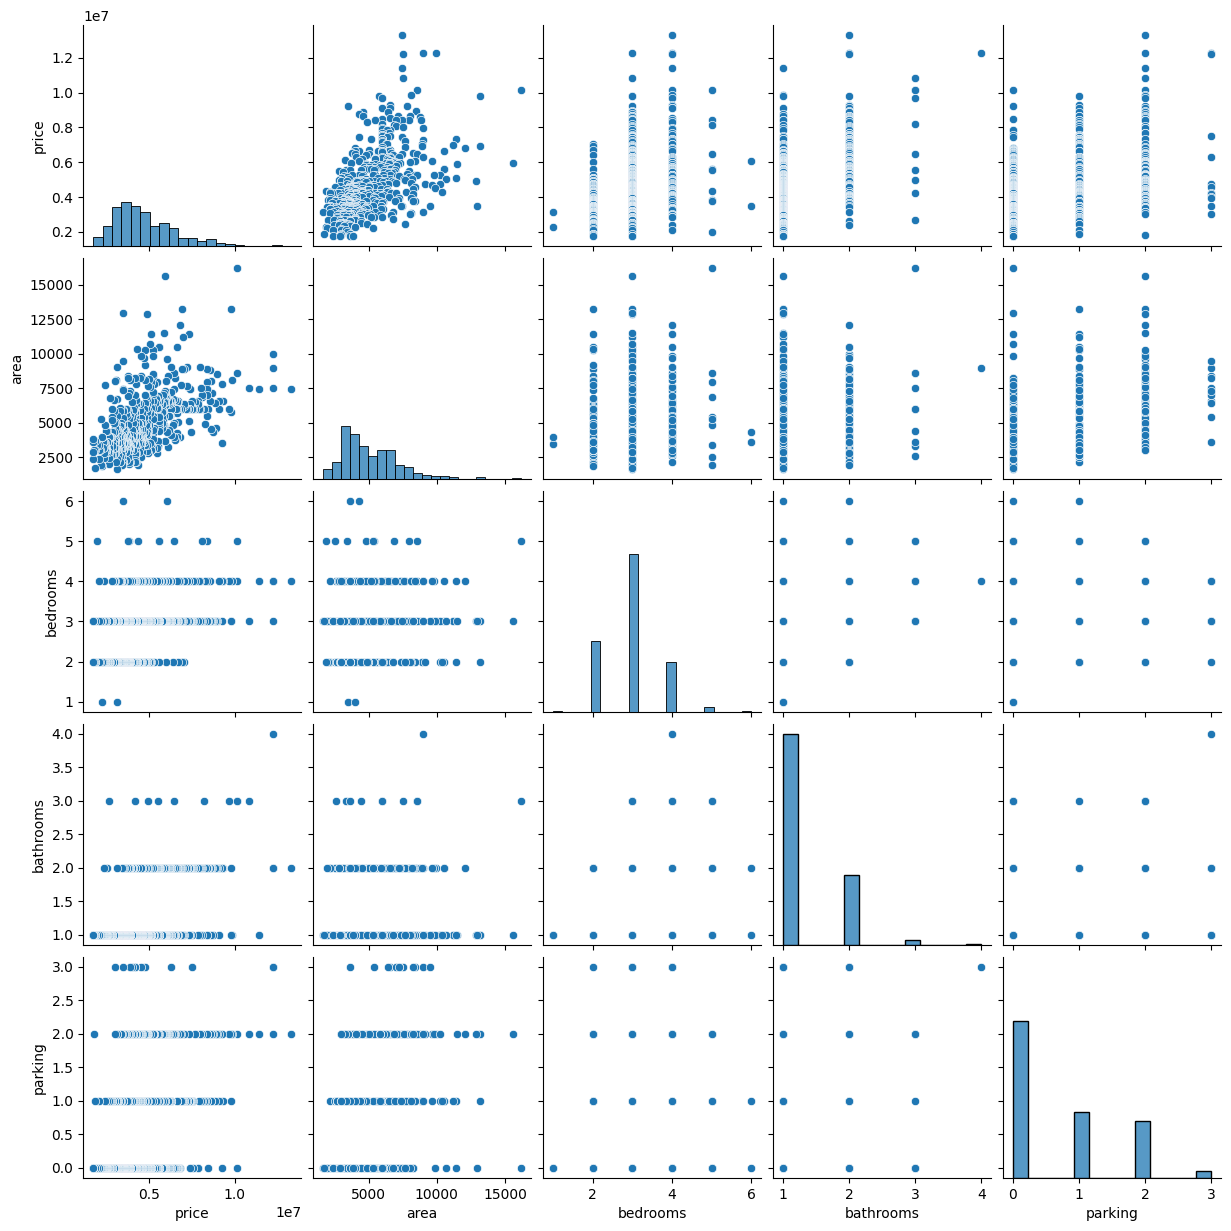

In [18]:
#Let's Do some Visualization Here 
sns.pairplot(data=df)

In [19]:
df.corr()

,price,area,bedrooms,bathrooms,parking
price,1.000000,0.535997,0.366494,0.517545,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.177496
parking,0.384394,0.352980,0.139270,0.177496,1.000000


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_17060\3049981835.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df["price"],y=df["area"],palette="Set2")


<Axes: xlabel='price', ylabel='area'>

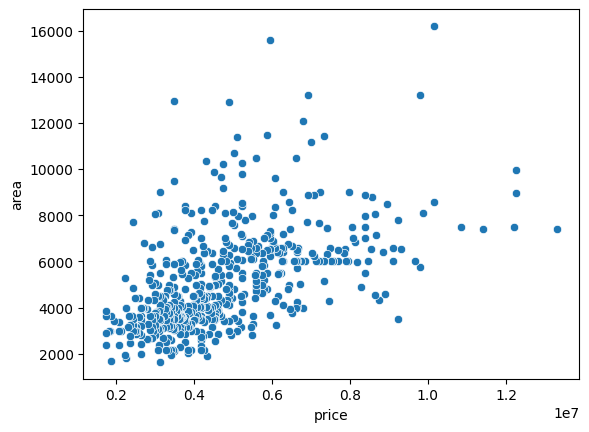

In [20]:
## Visualize this Datapoints .... By using Some Comparison
sns.scatterplot(x=df["price"],y=df["area"],palette="Set2") 
## See the Ans from Chatgpt , What is this "Hue" Parametr and what is this Mean

<Axes: xlabel='price', ylabel='area'>

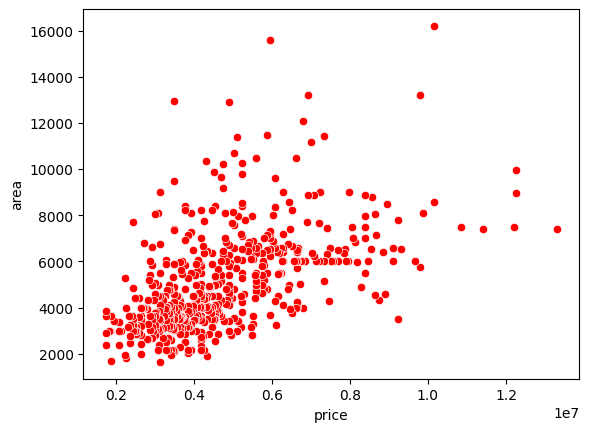

In [21]:
sns.scatterplot(x=df["price"],y=df["area"],color="r") 


<Axes: xlabel='price', ylabel='parking'>

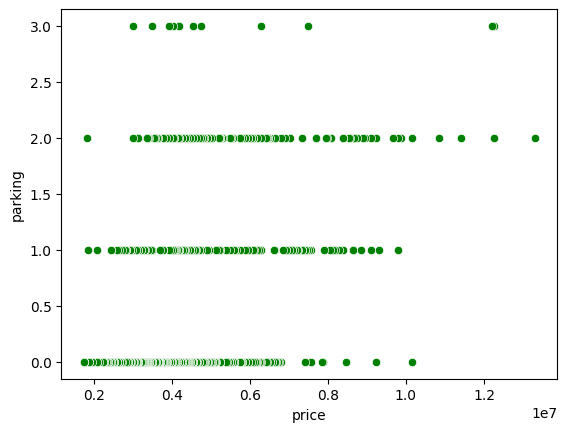

In [22]:
sns.scatterplot(x=df["price"],y=df["parking"],color="g")

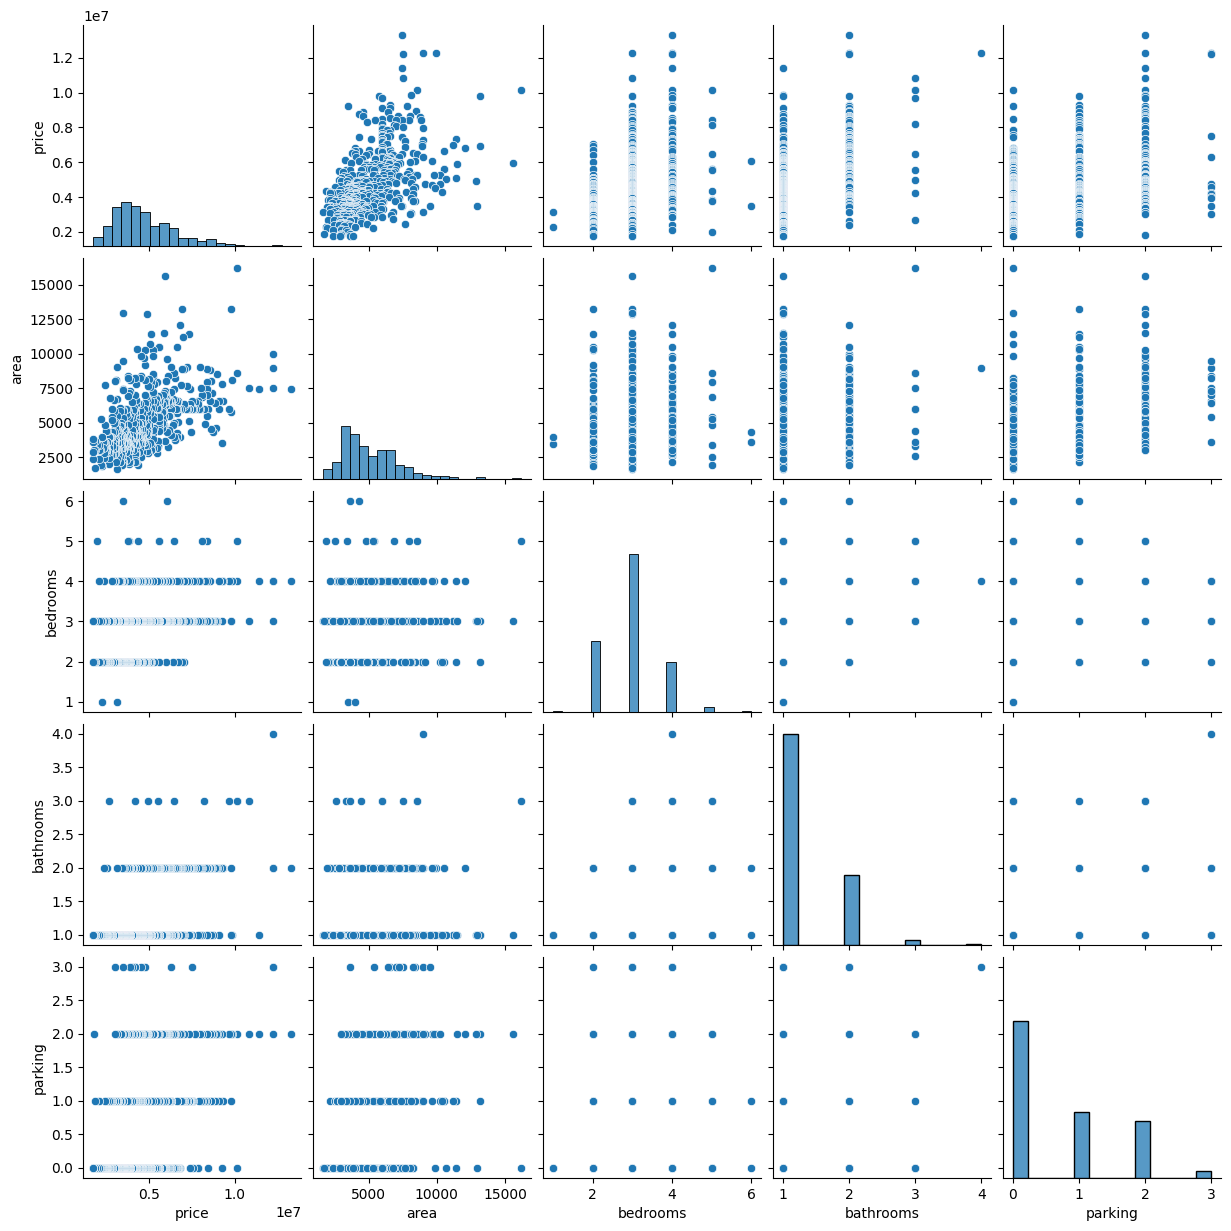

In [23]:
sns.pairplot(df)

In [24]:
### Let's Make Different Our "Dependent " and "InDependent " Features 


Y= df.iloc[:,:1]  # 0 th index is my "Output Vaaible "indeendent Features  
X=Y-df  #  0th index is my "Output Varaible ", Dependent Features , So Consider All Except 0th index is my "Independent Features "
print(X)


     area  bathrooms  bedrooms  parking  price
0     NaN        NaN       NaN      NaN      0
1     NaN        NaN       NaN      NaN      0
2     NaN        NaN       NaN      NaN      0
3     NaN        NaN       NaN      NaN      0
4     NaN        NaN       NaN      NaN      0
..    ...        ...       ...      ...    ...
540   NaN        NaN       NaN      NaN      0
541   NaN        NaN       NaN      NaN      0
542   NaN        NaN       NaN      NaN      0
543   NaN        NaN       NaN      NaN      0
544   NaN        NaN       NaN      NaN      0

[545 rows x 5 columns]


In [25]:
print(X) ## Independent Features 
print(Y) ## Depndent Features 


     area  bathrooms  bedrooms  parking  price
0     NaN        NaN       NaN      NaN      0
1     NaN        NaN       NaN      NaN      0
2     NaN        NaN       NaN      NaN      0
3     NaN        NaN       NaN      NaN      0
4     NaN        NaN       NaN      NaN      0
..    ...        ...       ...      ...    ...
540   NaN        NaN       NaN      NaN      0
541   NaN        NaN       NaN      NaN      0
542   NaN        NaN       NaN      NaN      0
543   NaN        NaN       NaN      NaN      0
544   NaN        NaN       NaN      NaN      0

[545 rows x 5 columns]
        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]


In [26]:
### Train / Test  Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25 ,random_state=42)
 

In [28]:

sns.regplot(df["price"],df["area"])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [29]:
sns.regplot(df["price"],df["bathrooms"])
# regplot :- This is to show the "Regression Plot "

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
# NOTE :- WE CANNOT DO THE REGPLOT FOR MORE THEN 2 COLUMNS 


In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\PYTHONCODE\venv\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance 

In [32]:
X_train
X_test

array([[nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  0.],
       [nan, n

In [34]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [35]:
regression.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
### Cross vale Score :- Cross Validation Score 
from sklearn.model_selection import cross_val_score
validation_score= cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",
                                  cv=3)

In [ ]:
np.mean(validation_score)

In [ ]:
### Prediction
Y_pred=regression.predict(X_test) 

In [ ]:
### Performance Matrix 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

In [ ]:
### R2 and Adjusted R2
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)
# Lets check the Accuracy 

### Assumptions :- 
After we Did the Prediction 

In [ ]:
residuals=Y_test-Y_pred

In [ ]:
plt.scatter(Y_test,Y_pred)
print(residuals)

In [ ]:
## Plot this Residuals 
sns.displot(data=residuals,kind="kde")

## If this Graph showing "Gauusian / Normal Distribution " then you can Assume that Your Model is Good 

In [ ]:
### Create a Scatter Plot wrt to the Prediction and Residuals
plt.scatter(Y_pred,residuals)

""" 
Conclusion :- 1) If This Plot follow some Pattern then , Assume there is Something Problem 
But, If the Plot is "Uniformly Distributed ", Assume you r Model is Good 
"""